In [4]:
import pandas as pd

df = pd.read_csv('Online Retail.csv', encoding='ISO-8859-1')

# Drop rows with missing CustomerID or Description
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

# Remove negative or zero quantities (for now)
df = df[df['Quantity'] > 0]

# Remove transactions with zero or negative price
df = df[df['UnitPrice'] > 0]

# Create a new column for Total Sales
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [5]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_products)


Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


/var/folders/r0/09krwlks0517n3028wxd64p40000gn/T/ipykernel_58503/1812112018.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

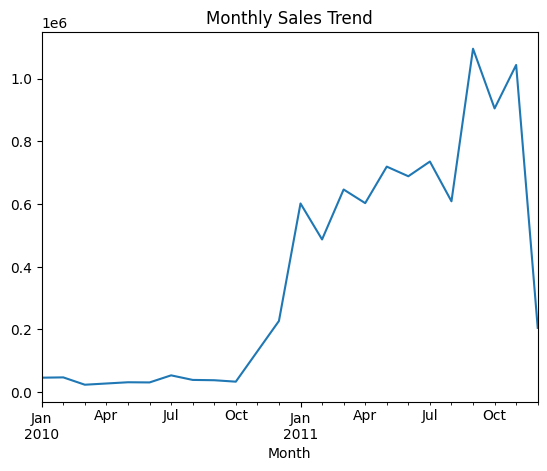

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['TotalPrice'].sum()
monthly_sales.plot(kind='line', title="Monthly Sales Trend")


In [7]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(country_sales.head(10))


Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64


In [8]:
customer_value = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
print(customer_value.head(10))


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


In [9]:
df['EstimatedProfit'] = df['TotalPrice'] * 0.30

In [10]:
profit_by_product = df.groupby('Description')['EstimatedProfit'].sum().sort_values(ascending=False)
print(profit_by_product.head(10))


Description
PAPER CRAFT , LITTLE BIRDIE           50540.880
REGENCY CAKESTAND 3 TIER              42777.885
WHITE HANGING HEART T-LIGHT HOLDER    30134.445
JUMBO BAG RED RETROSPOT               25566.234
MEDIUM CERAMIC TOP STORAGE JAR        24425.019
POSTAGE                               23341.188
PARTY BUNTING                         20653.299
ASSORTED COLOUR BIRD ORNAMENT         16974.102
Manual                                16133.979
RABBIT NIGHT LIGHT                    15403.860
Name: EstimatedProfit, dtype: float64


In [11]:
df.to_csv('cleaned_retail_data.csv', index=False)